In [59]:
import pandas as pd
import seaborn as sns

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

%matplotlib inline

In [89]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(25,7)})

**Проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.**

Сколько уникальных рекламных кампаний было проведено? 

In [3]:
df = pd.read_csv('conversion.csv')

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.shape

(1143, 11)

In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
df.xyz_campaign_id.nunique()

3

**Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.**

In [9]:
df_impressions = np.log(df\
    .groupby('fb_campaign_id', as_index=False)\
    .agg({'Impressions': 'sum'}))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


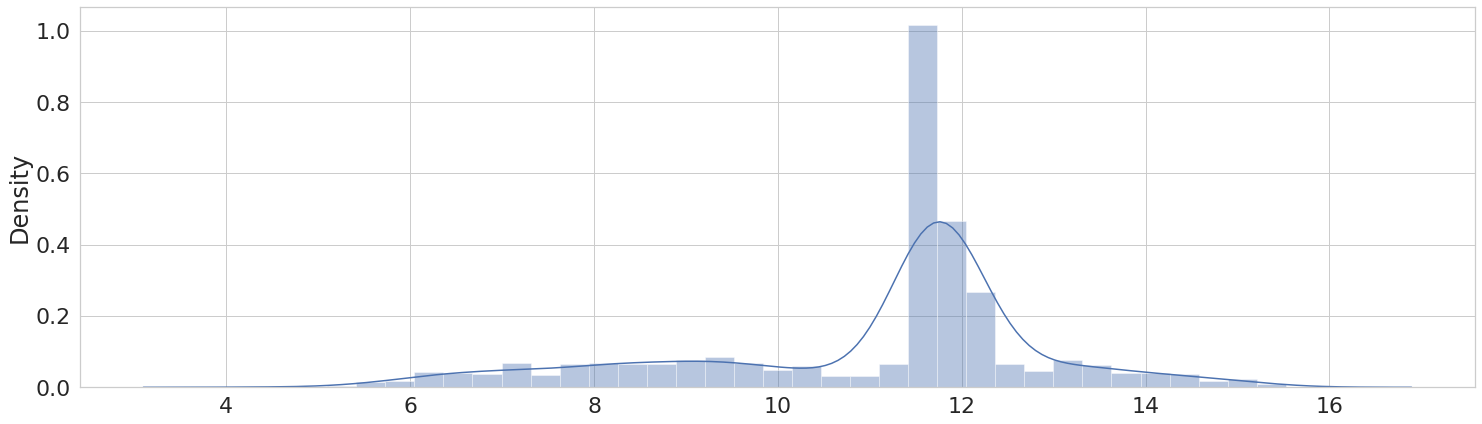

In [132]:
sns.distplot(df_impressions)

In [11]:
# Полученное распределение не является нормальным, распределение бимодальное

**Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.**

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

![img](./Screenshot_17.png)

In [12]:
df['CTR'] = df['Clicks'] / df['Impressions']

In [13]:
df.sort_values('CTR', ascending=False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


**Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?**

In [46]:
df_ctr_by_campagin = df\
    .query('xyz_campaign_id == 916')

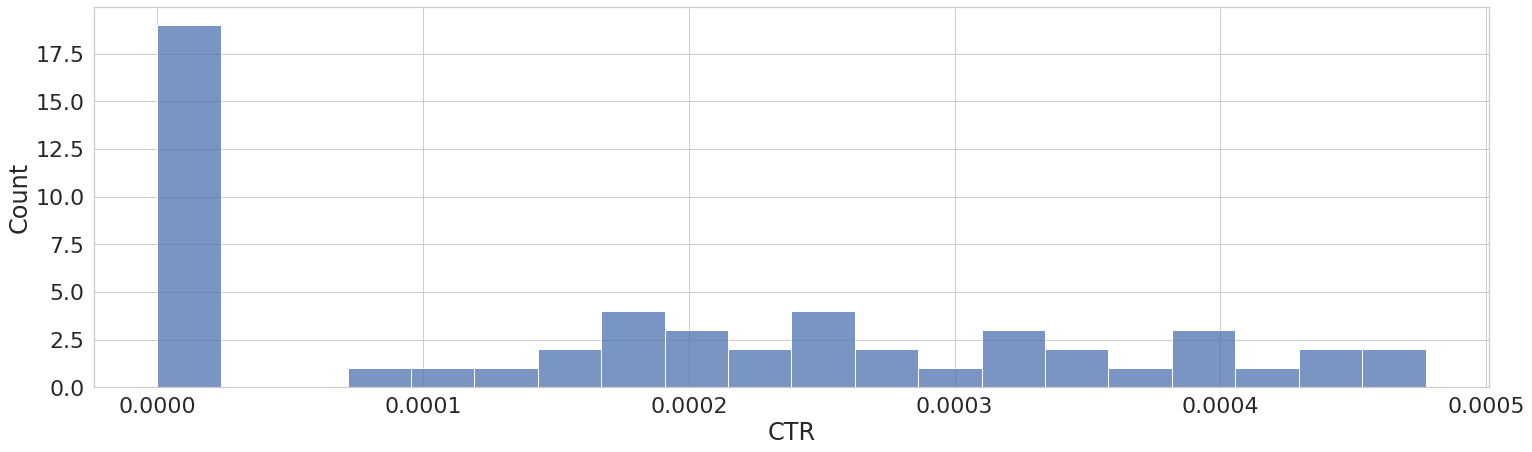

In [128]:
sns.histplot(data=df_ctr_by_campagin, x=df_ctr_by_campagin.CTR, bins=20, kde=False)

**CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:**

![img](./Screenshot_18.png)

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [56]:
df['CPC'] = df['Spent'] / df['Clicks']

In [58]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [64]:
round(ss.iqr(df.CPC, nan_policy='omit'), 2) # ss.iqr межквартильный размах, nan_policy='omit' сброс NaN значений

0.25

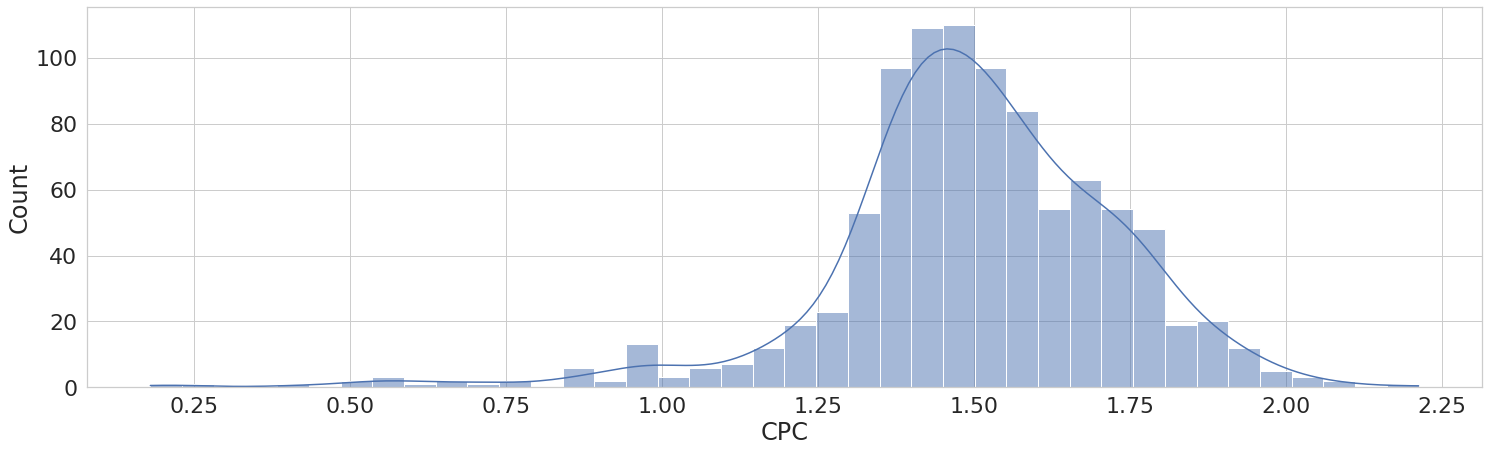

In [125]:
sns.histplot(data=df.CPC.dropna(), kde=True)

In [73]:
# ненормальное распределение

**Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.**

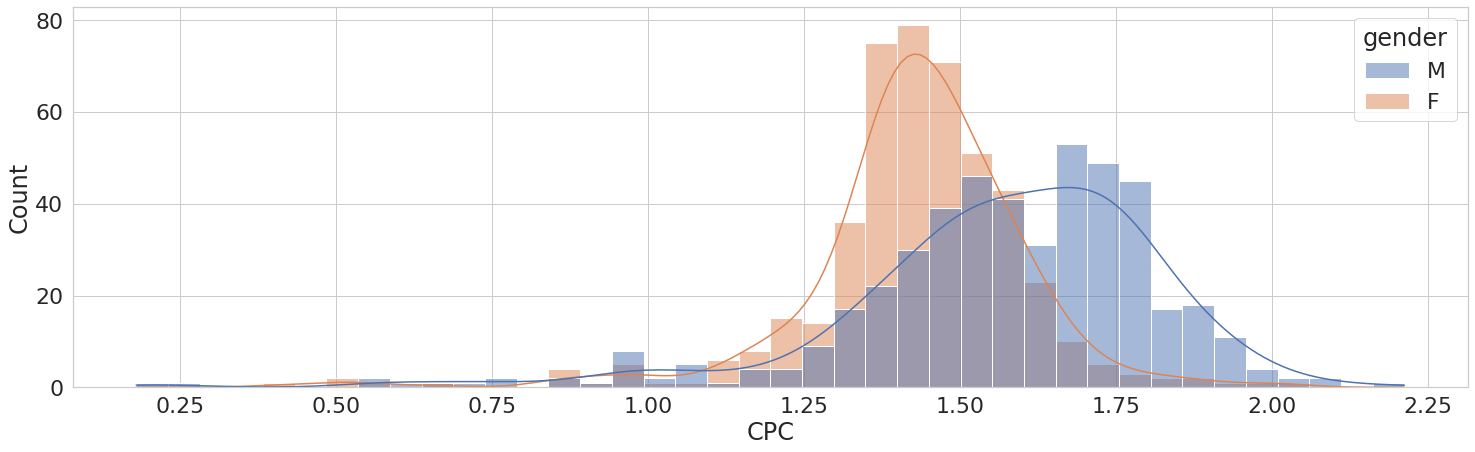

In [126]:
sns.histplot(data=df.dropna(), x='CPC', hue='gender', kde=True)

**Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.**

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [133]:
df['CR'] = df['Approved_Conversion'] / df['Clicks']

In [145]:
ad_1121814 = df.query('ad_id == 1121814')

In [148]:
round(ad_1121814.CR.mul(100), 2)

860    3.09
Name: CR, dtype: float64